# Plotting the Fine-mapping results

In [1]:
import pandas as pd

In [2]:
plot_list  = pd.read_csv("/mnt/mfs/hgrcgrid/homes/xc2610/7_cells/UpsetR_recipe", sep = "\t")
file_type = plot_list.columns.values.tolist()
file_type = [x.split(".")[0] for x in file_type ]
plot_list = plot_list.to_dict("records")

In [3]:
plot_list

[{'cell-specific eQTL': '/mnt/mfs/hgrcgrid/homes/xc2610/7_cells/7_cells_all_variants_zero_no_dup.tsv',
  'haQTL': '/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/haQTL_pure_completed_unlimited.tsv',
  'mQTL': '/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/meQTL_pure_completed_unlimited.tsv',
  'eQTL': '/mnt/vast/hpc/csg/molecular_phenotype_calling/sQTL_finemapping/ROSMAP_psichomics/Plot_final/eqtl_all_variants_zero.tsv',
  'sQTL(PSI)': '/mnt/vast/hpc/csg/molecular_phenotype_calling/sQTL_finemapping/ROSMAP_psichomics/Plot_final/PSI_all_variants_zero.tsv',
  'pQTL': '/mnt/vast/hpc/csg/molecular_phenotype_calling/sQTL_finemapping/ROSMAP_psichomics/Plot_final/pqtl_all_variants_zero.tsv',
  'ADGWAS': '/mnt/vast/hpc/csg/xqtl_workflow_testing/susie_rss/output/ADGWAS_finemapping_extracted/Bellenguez/ADGWAS_sumstat'}]

In [4]:
"','".join(file_type)

"cell-specific eQTL','haQTL','mQTL','eQTL','sQTL(PSI)','pQTL','ADGWAS"

In [5]:
library("dplyr")
library("readr") 
library("ggplot2")
library("purrr")
library("UpSetR")
library("ComplexUpset")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ComplexUpset’


The following object is masked from ‘package:UpSetR’:

    upset




In [8]:
plot_recipe = tibble( type = c('ct-eQTL','haQTL','meQTL','eQTL','sQTL(PSI)','pQTL','Bellenguez et al (2022)'), path = c('/mnt/mfs/hgrcgrid/homes/xc2610/7_cells/7_cells_all_variants_zero_no_dup.tsv', 
                                                                                                                 '/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/haQTL_pure_completed_unlimited.tsv',
                                                                                                                 '/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/meQTL_pure_completed_unlimited.tsv',
                                                                                                                 '/mnt/vast/hpc/csg/molecular_phenotype_calling/sQTL_finemapping/ROSMAP_psichomics/Plot_final/eqtl_all_variants_zero.tsv',
                                                                                                                 '/mnt/vast/hpc/csg/molecular_phenotype_calling/sQTL_finemapping/ROSMAP_psichomics/Plot_final/PSI_all_variants_zero.tsv',
                                                                                                                 '/mnt/vast/hpc/csg/molecular_phenotype_calling/sQTL_finemapping/ROSMAP_psichomics/Plot_final/pqtl_all_variants_zero.tsv',
                                                                                                                 '/mnt/vast/hpc/csg/xqtl_workflow_testing/susie_rss/output/ADGWAS_finemapping_extracted/Bellenguez/ADGWAS_sumstat'))

In [9]:
plot_recipe

type,path
<chr>,<chr>
ct-eQTL,/mnt/mfs/hgrcgrid/homes/xc2610/7_cells/7_cells_all_variants_zero_no_dup.tsv
haQTL,/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/haQTL_pure_completed_unlimited.tsv
meQTL,/mnt/vast/hpc/csg/molecular_phenotype_calling/QTL_fine_mapping/output/meQTL_pure_completed_unlimited.tsv
eQTL,/mnt/vast/hpc/csg/molecular_phenotype_calling/sQTL_finemapping/ROSMAP_psichomics/Plot_final/eqtl_all_variants_zero.tsv
sQTL(PSI),/mnt/vast/hpc/csg/molecular_phenotype_calling/sQTL_finemapping/ROSMAP_psichomics/Plot_final/PSI_all_variants_zero.tsv
pQTL,/mnt/vast/hpc/csg/molecular_phenotype_calling/sQTL_finemapping/ROSMAP_psichomics/Plot_final/pqtl_all_variants_zero.tsv
Bellenguez et al (2022),/mnt/vast/hpc/csg/xqtl_workflow_testing/susie_rss/output/ADGWAS_finemapping_extracted/Bellenguez/ADGWAS_sumstat


In [10]:
plot_list = map2(plot_recipe$type,plot_recipe$path, ~read_delim(.y, guess_max = 10000000)%>%mutate(cs = cs_order != 0 )%>%filter(cs > 0)%>%select(variants,cs)%>%`colnames<-`(c("variants",.x))%>%distinct() )

Rows: 428604 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): variants, ref, alt, cs_order, cs_id, log10_base_factor, molecular_t...
dbl (9): snps_index, chromosome, position, pip, posterior_mean, posterior_sd...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29043 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecular_trait_id
dbl (10): snps_index, chromosome, position, cs_order, pip, finemapped_region...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 65751 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): variants, ref, alt, molecul

In [11]:
cs_sharing = Reduce(full_join,plot_list)

Joining, by = "variants"
Joining, by = "variants"
Joining, by = "variants"
Joining, by = "variants"
Joining, by = "variants"
Joining, by = "variants"


In [12]:
# checking total number of SNPs
715303-sum(is.na(cs_sharing[, 3]))

[1] 29043

In [28]:
head(cs_sharing)

variants,ct-eQTL,haQTL,meQTL,eQTL,sQTL(PSI),pQTL,Bellenguez et al (2022)
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
chr10:100327281_T_C,TRUE,NA,TRUE,NA,NA,NA,NA
chr10:100329417_C_A,TRUE,NA,NA,TRUE,NA,NA,NA
chr10:100329679_G_A,TRUE,NA,NA,TRUE,NA,NA,NA
chr10:100329906_C_T,TRUE,NA,TRUE,TRUE,NA,NA,NA
chr10:100337826_T_C,TRUE,NA,NA,TRUE,NA,NA,NA
chr10:100344843_AT_ATT,TRUE,NA,NA,TRUE,NA,NA,NA


In [29]:
cs_upsetR_sharing = cs_sharing
cs_upsetR_sharing[,2:ncol(cs_upsetR_sharing)]%>%mutate_all(as.numeric)-> cs_upsetR_sharing[,2:ncol(cs_upsetR_sharing)]

In [30]:
head(cs_upsetR_sharing)

variants,ct-eQTL,haQTL,meQTL,eQTL,sQTL(PSI),pQTL,Bellenguez et al (2022)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10:100327281_T_C,1,NA,1,NA,NA,NA,NA
chr10:100329417_C_A,1,NA,NA,1,NA,NA,NA
chr10:100329679_G_A,1,NA,NA,1,NA,NA,NA
chr10:100329906_C_T,1,NA,1,1,NA,NA,NA
chr10:100337826_T_C,1,NA,NA,1,NA,NA,NA
chr10:100344843_AT_ATT,1,NA,NA,1,NA,NA,NA


## Plot the left side bar on all significant SNPs

In [24]:
b = upset(cs_upsetR_sharing%>%as.data.frame,intersect = colnames(cs_upsetR_sharing[2:ncol(cs_upsetR_sharing)]),
      keep_empty_groups = F,
          base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 5)   )  ) ,
              themes=upset_default_themes(axis.text=element_text(size=30))     ,
              min_degree = 1)

Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Converting non-logical columns to binary: ct-eQTL, haQTL, meQTL, eQTL, sQTL(PSI), pQTL, Bellenguez et al (2022)”
Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Detected missing values in the columns indicating sets, coercing to FALSE”


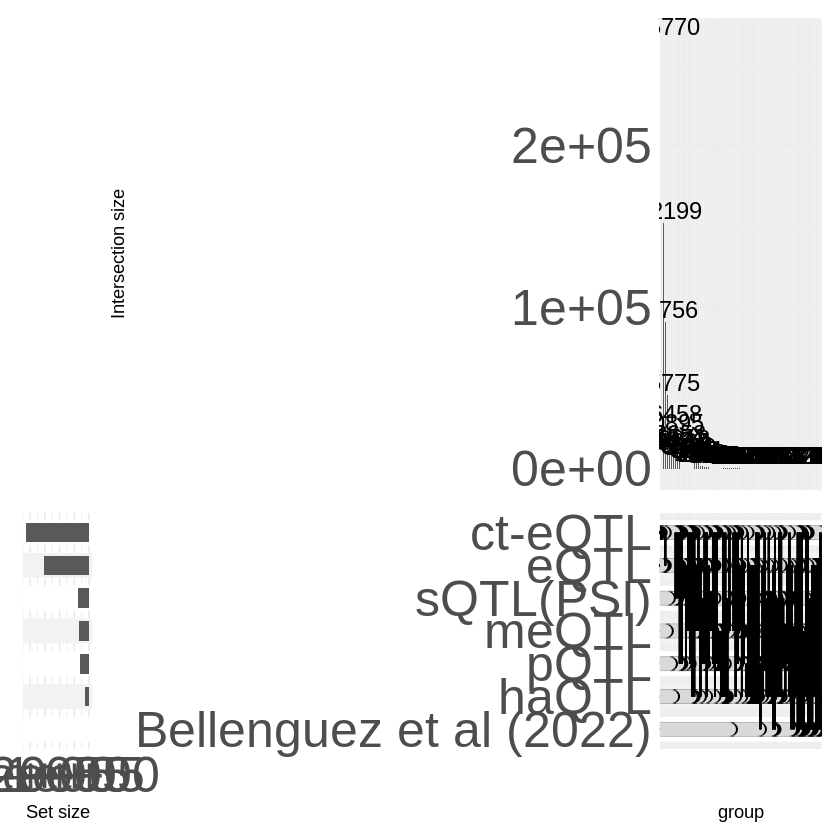

In [26]:
b

In [ ]:
b%>%ggsave(filename = "/mnt/mfs/hgrcgrid/homes/xc2610/7_cells/Plot2/cell-specific eQTL_haQTL_mQTL_eQTL_sQTL(PSI)_pQTL_ADGWAS.UpSetR.pdf",device = "pdf",dpi = "retina",width=18.5, height=10.5)
list(cs_upsetR_sharing)%>%saveRDS("/mnt/mfs/hgrcgrid/homes/xc2610/7_cells/Plot2/cell-specific eQTL_haQTL_mQTL_eQTL_sQTL(PSI)_pQTL_ADGWAS.UpSetR.rds")

## Plot the right side bar on overlaps with ADGWAS only

In [31]:
cs_upsetR_sharing = cs_upsetR_sharing[!is.na(cs_upsetR_sharing$"Bellenguez et al (2022)"),]

In [32]:
head(cs_upsetR_sharing)

variants,ct-eQTL,haQTL,meQTL,eQTL,sQTL(PSI),pQTL,Bellenguez et al (2022)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr15:63277703_C_T,1,1,NA,1,NA,NA,1
chr17:63470201_G_A,1,NA,NA,NA,NA,1,1
chr17:63471115_G_A,1,NA,NA,NA,NA,1,1
chr17:63471587_C_A,1,NA,NA,NA,NA,1,1
chr17:63473368_C_A,1,NA,NA,1,NA,1,1
chr17:63476980_C_T,1,NA,NA,1,NA,1,1


In [33]:
cs_upsetR_sharing = cs_upsetR_sharing[rowSums(is.na(cs_upsetR_sharing[,2:7]))!=6,]

In [34]:
a = upset(cs_upsetR_sharing%>%as.data.frame,intersect = colnames(cs_upsetR_sharing[2:ncol(cs_upsetR_sharing)]),
      keep_empty_groups = F,
          base_annotations=list(`Intersection size` = intersection_size( bar_number_threshold = 1, position = position_dodge(0.5), width = 0.3 ,text = list(size = 5)   )  ) ,
              themes=upset_default_themes(axis.text=element_text(size=30))     ,
              min_degree = 1)

Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Converting non-logical columns to binary: ct-eQTL, haQTL, meQTL, eQTL, sQTL(PSI), pQTL, Bellenguez et al (2022)”
Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Detected missing values in the columns indicating sets, coercing to FALSE”


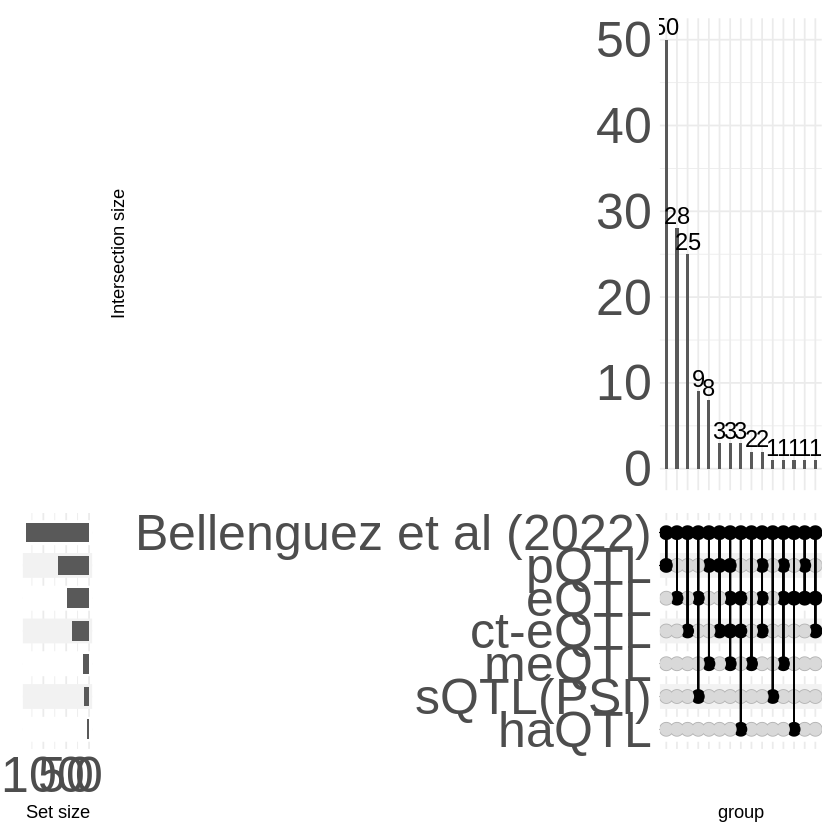

In [35]:
a

In [36]:
a%>%ggsave(filename = "/mnt/mfs/hgrcgrid/homes/xc2610/7_cells/Plot2/ADGWAS.UpSetR.pdf",device = "pdf",dpi = "retina",width=18.5, height=10.5)
list(cs_upsetR_sharing)%>%saveRDS("/mnt/mfs/hgrcgrid/homes/xc2610/7_cells/Plot2/ADGWAS.UpSetR.rds")